In [224]:
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage.transform import rescale
import cv2
import matplotlib.pyplot as plt

name1 = "picture3"
name2 = "picture4"
name3 = "picture5"

imname1 = "hybridimages/" + name1 + ".jpg"
imname2 = "hybridimages/" + name2 + ".jpg"
imname3 = "hybridimages/" + name3 + ".jpg"
img1 = cv2.imread(imname1)
im1 = img1.astype(np.single)/255
img2 = cv2.imread(imname2)
im2 = img2.astype(np.single)/255
img3 = cv2.imread(imname3)
im3 = img3.astype(np.single)/255

im1_Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im3_Gray = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

In [225]:
def cv2_imshow(image):
# developed by Kanishke Gamagedara, udpated by MAE6292
    plt.figure(dpi=200)
    mode = len(np.shape(image))
    if mode==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    elif mode==2:
        plt.imshow(image, cmap='gray')
    else:
        print('Unsuported image size')
        raise
    plt.xticks([]), plt.yticks([]) 
    plt.axis('off')

In [232]:
def hybridImage(im1, im2, sigmaLP, sigmaHP):
    lowPass = cv2.GaussianBlur(im1, (sigmaLP*4+1, sigmaLP*4+1), sigmaLP)
    im2_Blur = cv2.GaussianBlur(im2, (sigmaHP*4+1, sigmaHP*4+1), sigmaHP)
    
    highPass = im2 - im2_Blur
    
    return lowPass, highPass, (highPass+lowPass)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


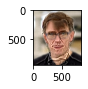

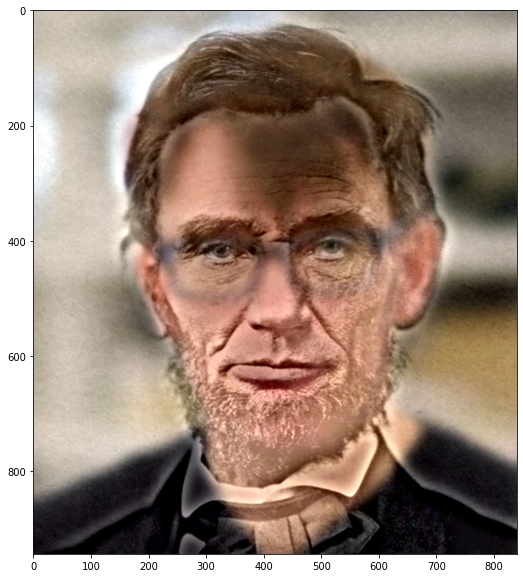

In [240]:
low1, high1, mixed1 = hybridImage(im1, im2, 10, 15)
plt.figure(figsize=(1,1))
plt.imshow(cv2.cvtColor(mixed1, cv2.COLOR_BGR2RGB))

plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(mixed1, cv2.COLOR_BGR2RGB))


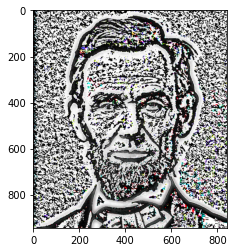

In [228]:
# cv2_imshow((high1*255.0).astype(np.uint8))
plt.imshow(((1.0-high1)*255.0).astype(np.uint8), cmap="gray")

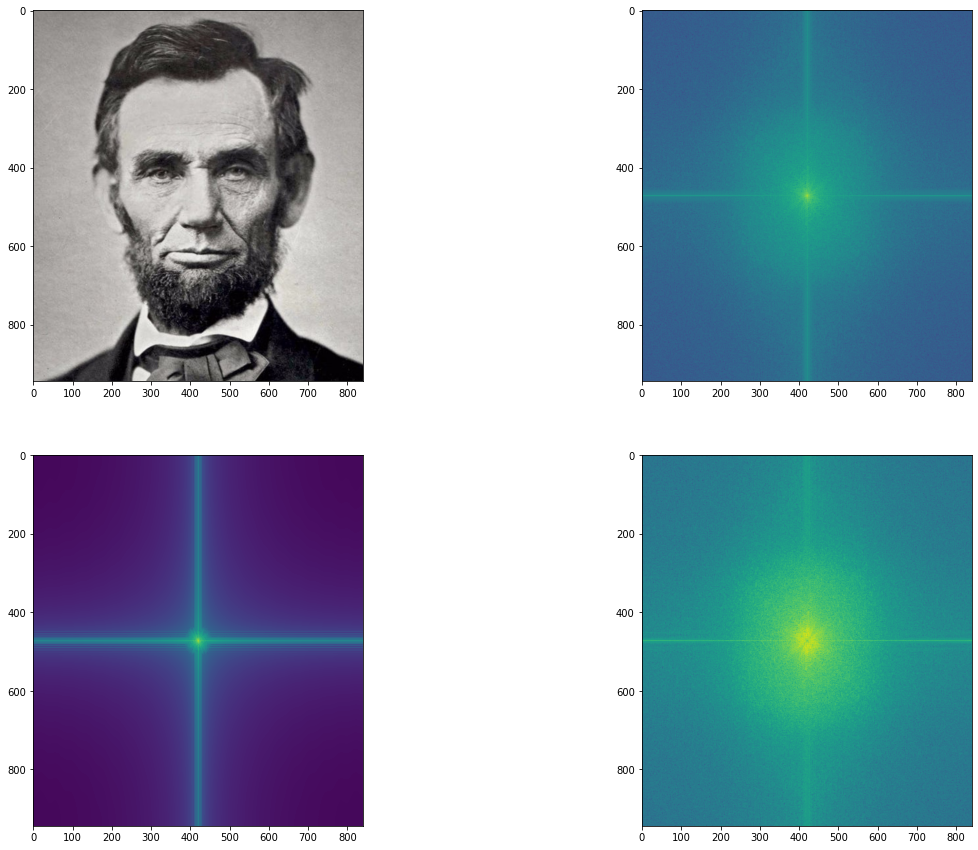

In [329]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_Gray)))))
plt.subplot(2,2,3)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(low1, cv2.COLOR_BGR2GRAY))))))
plt.subplot(2,2,4)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(cv2.cvtColor(high1, cv2.COLOR_BGR2GRAY))))))


In [330]:
def hybridImage2(im1, im2, im3, sigmaLP, sigmaMP, sigmaHP):
    lowPass = cv2.GaussianBlur(im1, (sigmaLP*4+1, sigmaLP*4+1), sigmaLP)
    im2_Blur = cv2.GaussianBlur(im2, (sigmaMP*4+1, sigmaMP*4+1), sigmaMP)
    im3_Blur = cv2.GaussianBlur(im3, (sigmaHP*4+1, sigmaHP*4+1), sigmaHP)
    
    midPass =  im2_Blur - cv2.GaussianBlur(im2_Blur, (sigmaMP*4+1, sigmaMP*4+1), sigmaMP)
    highPass = im3 - im3_Blur
    
    return lowPass, midPass, highPass, (lowPass+(midPass)+highPass)


def hybridImage3(im1, im2, im3, sigmaLP, sigmaMP, sigmaHP):
    im1_Blur = cv2.GaussianBlur(im1, (sigmaLP*4+1, sigmaLP*4+1), sigmaLP)
    im2_Blur = cv2.GaussianBlur(im2, (sigmaMP*4+1, sigmaMP*4+1), sigmaLP)
    im3_Blur = cv2.GaussianBlur(im3, (sigmaHP*4+1, sigmaHP*4+1), sigmaLP)
    
    im2_High = im2 - im2_Blur
    im3_High = im3 - im3_Blur
    
    im2_Mid = im2 - cv2.GaussianBlur(im2_Blur, (sigmaMP*2+1, sigmaMP*2+1), sigmaLP) - 0.3*im2_High
#     im3_Mid = im3 - cv2.GaussianBlur(im3_Blur, (sigmaMP*4+1, sigmaMP*4+1), sigmaLP) - 0.5*im3_High
    
    return im12, im23, (im1_Blur+im2_Mid+im3_High)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


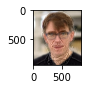

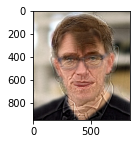

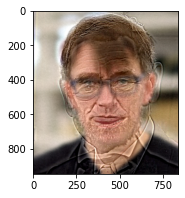

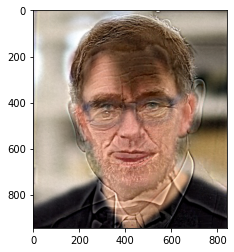

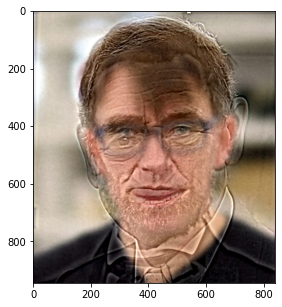

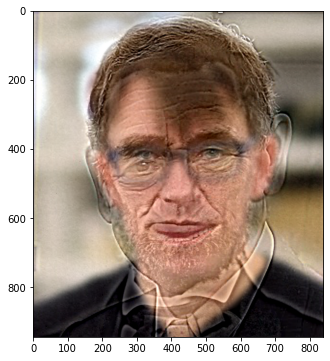

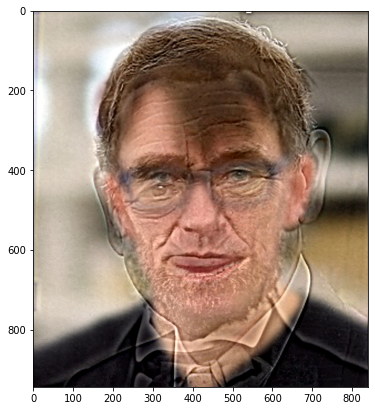

In [331]:
im12, im23, mixed2 = hybridImage3(im1, im2, im3 , 10,8,5)
# plt.figure(figsize=(5,5))
# plt.imshow(mid2+0.1)



plt.figure(figsize=(1,1))
plt.imshow(cv2.cvtColor(mixed2, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(2,2))
plt.imshow(cv2.cvtColor(mixed2, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(mixed2, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(mixed2, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(mixed2, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(mixed2, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(6,7))
plt.imshow(cv2.cvtColor(mixed2, cv2.COLOR_BGR2RGB))